<p style="background-color:#CC9911;text-align:center;vertical-align: middle;padding:30px;font-family:courier;font-size:30px;color:black">
    To merge with master
</p>

In [211]:
import numpy as np
import matplotlib.pyplot as plt
# Test
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from problem import get_24h_cgm_data

In [212]:
def print_multiple_file(df, threshold=None):
    """
    Plot the interstitial glucose rate for several patients take only 24 first hours
    """
    n = len(df)
    time = df.columns
    fig = plt.figure(figsize=(15, (n+2)//3*5))
    if not threshold:
        for i in range(1, n+1):
            ax = fig.add_subplot((n+2)//3, 3, i)
            ax.plot(time, df.iloc[i-1])
            ax.xaxis.set_major_locator(plt.MaxNLocator(15))
            ax.set_title(f'Patient number {df.index[i-1]}')
            plt.xticks(rotation=45)
        plt.tight_layout()     
        plt.show()
    else:
        for i in range(1, n+1):
            ax = fig.add_subplot((n+2)//3, 3, i)
            ym1 = np.ma.masked_where(df.iloc[i-1] < threshold, df.iloc[i-1])
            ym2 = np.ma.masked_where(df.iloc[i-1] >= threshold, df.iloc[i-1])
            lines = ax.plot(time, df.iloc[i-1].to_numpy(), time, ym1, time, ym2)
            plt.setp(lines[0], color='b')
            plt.setp(lines[1], color='r')
            plt.setp(lines[2], color='g')
            plt.legend((f'Intersection', f'Glycemia <= {threshold}', f'Glycemia > {threshold}'),
                    loc='upper right')

            ax.xaxis.set_major_locator(plt.MaxNLocator(15))
            ax.set_title(f'Patient number {df.index[i-1]}')
            plt.xticks(rotation=45)
        plt.tight_layout()     
        plt.show()

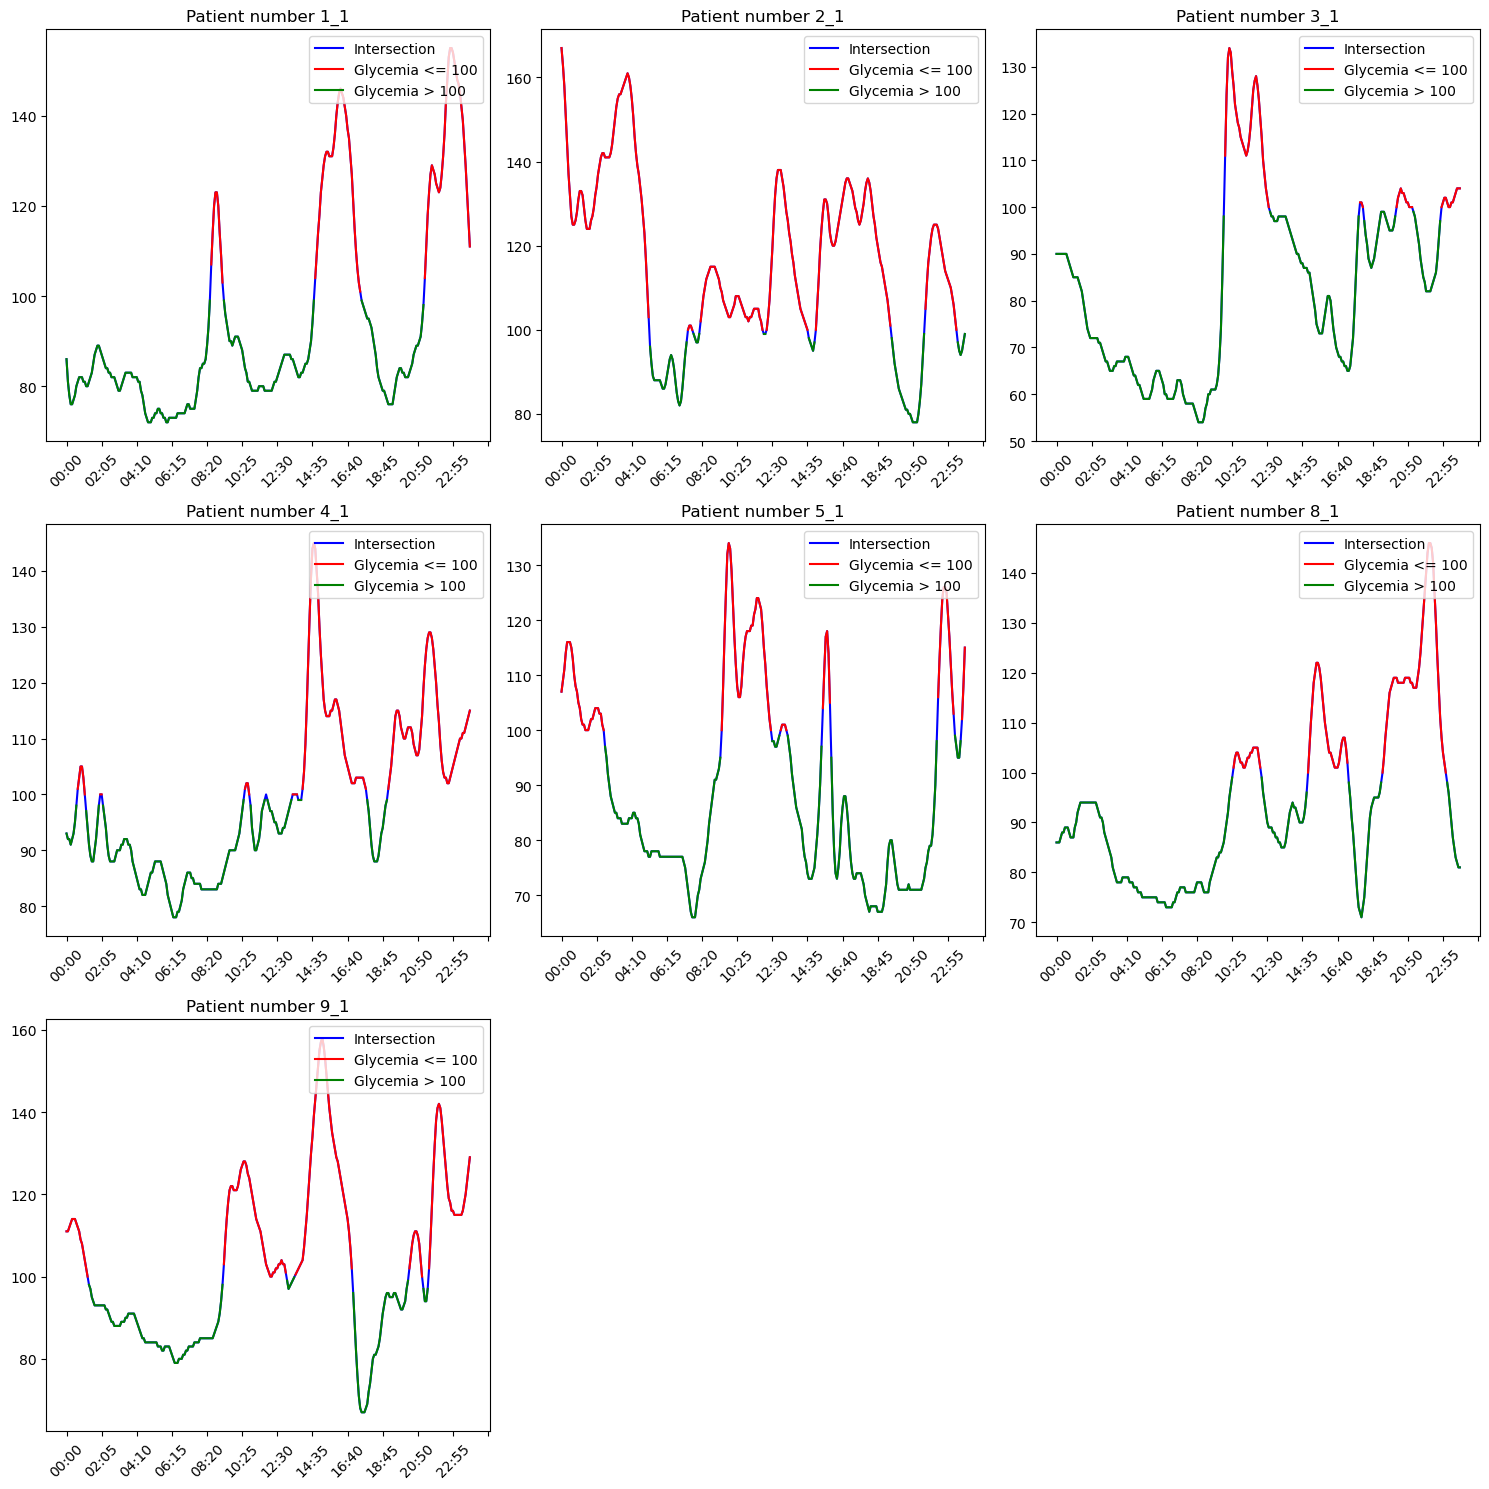

In [213]:
#Test
df = get_24h_cgm_data(user_id_list=[1, 2, 3, 4, 5, 8, 9], path='../')
df_24 = df.filter(like='_1', axis=0)
print_multiple_file(df_24, threshold=100)

### Mandatory structure of a submission


A submission (usually stored in `./subsmissions/<submission_foldername>/`) must contain on file named `estimator.py`.

This python script must itself implement at least a `Diabetes_Classifier` class with
 * A `fit(x_train, y_train)` method.
 * A `pred(x_test)` method.

The two arguments must be understood as follow:
 * `x_train` (resp `x_test`) is a numpy array containing the data with the extracted features for each patient in the training set (resp test set).
 * `y_train` is a 1-D numpy array containing the associated training labels.

We illustrate this below with a simple example.


### Illustration : a dummy random classifier

This classifier does not use (nor even load into memory) the features of the patients, and just predict random labels. Still, it is a valid submission regarding the RAMP workflow.

It is implemented in the `./subsmissions/starting_kit/` folder and we copy its code here for illustration.

In [ ]:
class Diabetes_Classifier():
    pass

<p style="background-color:#CC9911;text-align:center;vertical-align: middle;padding:30px;font-family:courier;font-size:30px;color:black">
    End To Merge
</p>

<p style="background-color:#CC9911;text-align:center;vertical-align: middle;padding:30px;font-family:courier;font-size:30px;color:black">
    Libraries
</p>

In [41]:
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

TODO:

- Faire exception patient 79
- Gerer 24 et 48 heures

<p style="background-color:#CC9911;text-align:center;vertical-align: middle;padding:30px;font-family:courier;font-size:30px;color:black">
    Analyses of data
</p>

In [149]:
dir_data = 'data/S1/'


class Data_Reader:
    def __init__(self, directory=dir_data):
        self.directory = directory

    def read_one_file(self, patient_number):
        """
        Select and read a single file
        """
        try:
            return pd.read_csv(os.path.join(self.directory, f'case  {patient_number}.csv'), sep=',').drop('Unnamed: 0', axis=1)
        
        except:
            if patient_number == 79:
                print("No patient 79")

    def read_all_files(self, directory):
        """
        Select and read all files
        """
        df = pd.DataFrame()
        
        for file in glob(self.directory+'*.csv', recursive=True):
            if pd.read_csv(file).drop('Unnamed: 0', axis=1).shape[0]!=576:
                print(file)
                print(pd.read_csv(file).drop('Unnamed: 0', axis=1).shape)
        #     df = pd.concat([df , pd.read_csv(file).drop('Unnamed: 0', axis=1)], axis=1)
        #     #df.columns = pd.MultiIndex.from_product([[1,2],['A','B']])
        # print(df)

    def get_idpatient_short(self):
        """
        Get the patients with 24 hours mesures
        """
        short = {'id':[], 'len':[]}

        for file in glob(self.directory+'*.csv', recursive=True):
            if pd.read_csv(file).drop('Unnamed: 0', axis=1).shape[0]!=576:
                short['id'].append(file)
                short['len'].append(pd.read_csv(file).drop('Unnamed: 0', axis=1).shape[0])
        return short

    def print_one_file(self, patient_number):
        """
        Plot the interstitial glucose rate for one patient
        """
        df = self.read_one_file(patient_number)#.iloc[:288]
        df.plot('hora', 'glucemia')

    def print_multiple_file(self, list_patients):
        """
        Plot the interstitial glucose rate for several patients take only 24 first hours
        """
        n = len(list_patients)
        fig = plt.figure(figsize=(15, (n+2)//3*6))

        for i in range(1, n+1):
            ax = fig.add_subplot((n+2)//3, 3, i)
            df = self.read_one_file(i).iloc[:288]
            ax.plot('hora', 'glucemia', data=df)
            ax.xaxis.set_major_locator(plt.MaxNLocator(10))
            ax.set_title(f'Patient number {list_patients[i-1]}')
            plt.xticks(rotation=45)
        
        plt.tight_layout()     
        plt.show()


# EXEMPLES =================================
# pd.set_option('display.max_rows', 100)
# data = Data_Reader(dir_data)
# data.print_multiple_file([5, 1, 2])
#read_all_files(dir_data)
# print(pd.read_csv(os.path.join(dir_data, 'case  1.csv')))

<p style="background-color:#CC9911;text-align:center;vertical-align: middle;padding:30px;font-family:courier;font-size:30px;color:black">
    Simple Model
</p>

In [170]:
clinical_data = pd.read_csv(os.path.join(dir_data, 'clinical_data.txt'), sep=' ')
print(clinical_data['T2DM'].describe(), '\n')

clinical_data = clinical_data.drop(['T2DM', 'follow.up'], axis=1).interpolate()
print(clinical_data.isna().sum())


count       208
unique        2
top       False
freq        191
Name: T2DM, dtype: object 

gender       0
age          0
BMI          0
glycaemia    0
HbA1c        0
dtype: int64


In [195]:
def make_clinical_dataset(dir_data):
    """
    Create a dataset from clinical dataset and binarize label
    0=False, 1=True
    """
    clinical_data = pd.read_csv(os.path.join(dir_data, 'clinical_data.txt'), sep=' ')
    X = clinical_data.drop(['T2DM', 'follow.up'], axis=1)
    X = X.interpolate().to_numpy()
    y = clinical_data['T2DM'].astype(int).to_numpy()
    return X, y

In [209]:
# First test with random oversampling and undersampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


X, y = make_clinical_dataset(dir_data)

# No sampling
tree = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(tree, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
#plot_tree(tree)
print('F1-score: {:.3f}'.format(mean(scores)))

# With Sampling
over = RandomOverSampler(sampling_strategy='minority')
under = RandomUnderSampler(sampling_strategy='majority')
steps = [('o', over), ('u', under), ('m', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
print('F1-score: {:.3f}'.format(mean(scores)))

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.